# Plots de distribuições

Vamos discutir alguns gráficos que nos permitem visualizar a distribuição de um conjunto de dados. Esses plots são:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

___
## Imports

In [1]:
import seaborn as sns
%matplotlib inline

## Dados
Seaborn vem com conjuntos de dados embutidos.

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

O distplot mostra a distribuição de um conjunto de observações de uma variável.

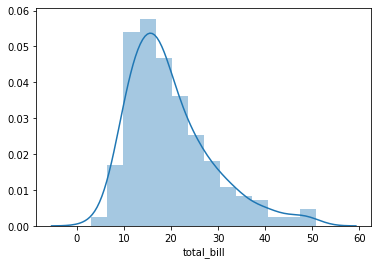

In [4]:
sns.distplot(tips['total_bill'])

Para remover a camada kde e apenas usar o histograma:

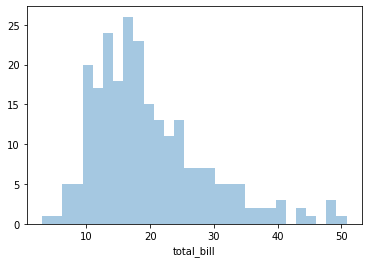

In [5]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

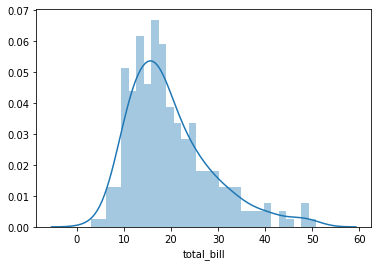

In [8]:
sns.distplot(tips['total_bill'],kde=True,bins=30)

## jointplot

jointplot() permite combinar basicamente dois distplots() para dados bivariados. Podemos visualizar os dados das seguintes formas (usando o **kind**):
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

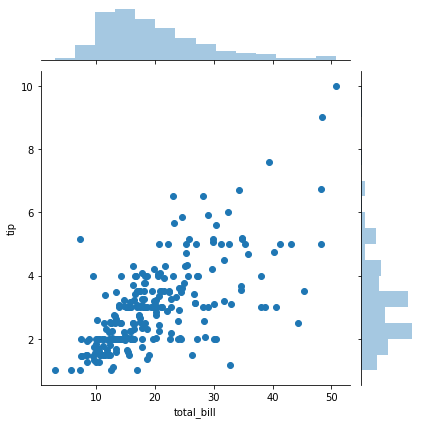

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

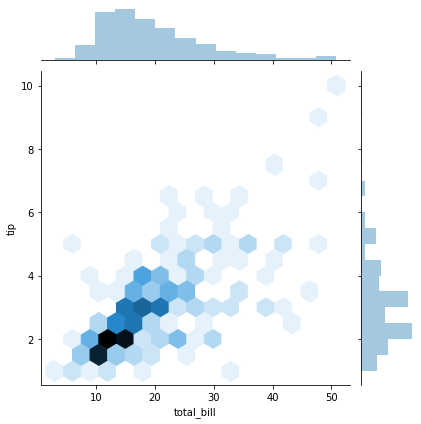

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

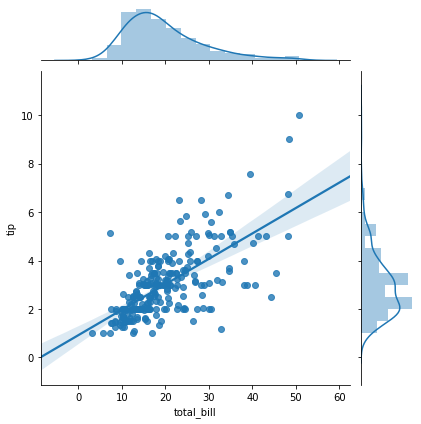

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## pairplot

pairplot irá traçar distribuições entre pares em todo o DataFrame (para as colunas numéricas) e suporta um argumento de matiz de cor (para colunas categóricas).

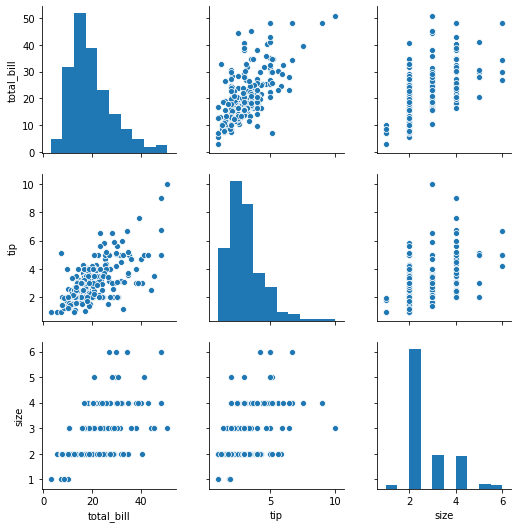

In [14]:
sns.pairplot(tips)

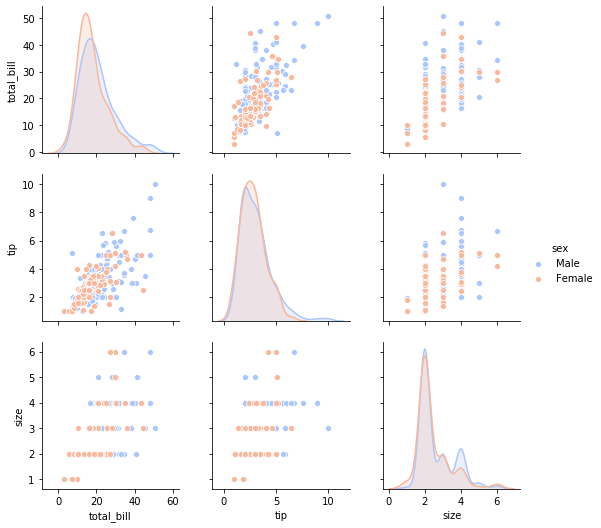

In [15]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## rugplot

rugplots possuem um conceito muito simples, eles apenas desenham uma marca de traço para cada ponto em uma distribuição univariada. Eles são o bloco de construção de um KDE:

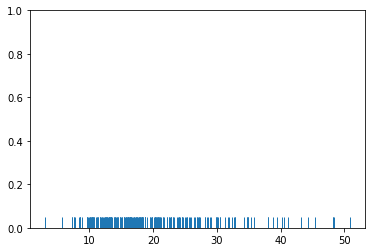

In [20]:
sns.rugplot(tips['total_bill'])

In [17]:
tips['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
5      25.29
6       8.77
7      26.88
8      15.04
9      14.78
10     10.27
11     35.26
12     15.42
13     18.43
14     14.83
15     21.58
16     10.33
17     16.29
18     16.97
19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
24     19.82
25     17.81
26     13.37
27     12.69
28     21.70
29     19.65
       ...  
214    28.17
215    12.90
216    28.15
217    11.59
218     7.74
219    30.14
220    12.16
221    13.42
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
227    20.45
228    13.28
229    22.12
230    24.01
231    15.69
232    11.61
233    10.77
234    15.53
235    10.07
236    12.60
237    32.83
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

## kdeplot

kdeplots são [Plots de estimativa de densidade kernel](https://pt.wikipedia.org/wiki/Estimativa_de_densidade_kernel#Estimativa_prática_da_largura_de_banda). Esses plots KDE substituem cada observação com uma distribuição Gaussiana (Normal) centrada em torno desse valor. Por exemplo:

(0, 1)

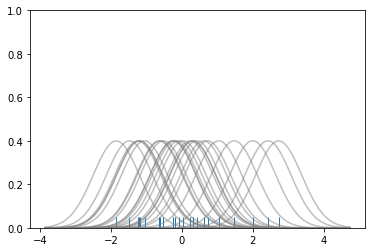

In [21]:
# Este código é apenas para exibir o diagrama abaixo
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Cria o dataset
dataset = np.random.randn(25)

# Cria outro rugplot
sns.rugplot(dataset);

# Configure o eixo dos x para o gráfico
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 pontos igualmente espaçados de x_min para x_max
x_axis = np.linspace(x_min,x_max,100)

# Configure a largura de banda. Para obter informações sobre isso:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Crie uma lista de kernel vazia
kernel_list = []

# Traça cada função de base
for data_point in dataset:
    
    # Crie um kernel para cada ponto e acrescente à lista
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Ajusta a escala para plotar
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

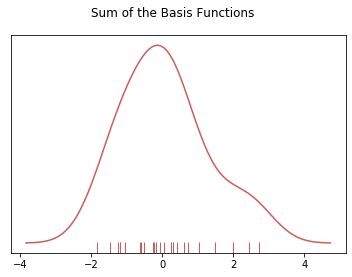

In [22]:
# Para obter o gráfico do kde podemos somar essas funções de base.
# Traça a soma da função de base
sum_of_kde = np.sum(kernel_list,axis=0)

# Plota a figura
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Adiciona o rugplot inicial
sns.rugplot(dataset,c = 'indianred')

# Livrar-se das marcas de "y-tick"
plt.yticks([])

# Define o título
plt.suptitle("Sum of the Basis Functions")

Então, com nosso DataFrame tips:

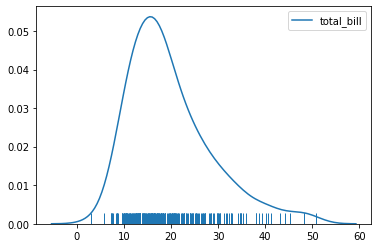

In [23]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

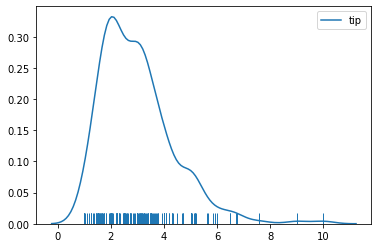

In [24]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])